# <div style="text-align: center">Análise Exploratória & Limpeza de dados</div> 

* **Base de dados:** TAXA DE JUROS DE OPERAÇÕES DE CRÉDITO - DIÁRIO. 
> Disponibilizado pelo Banco Central do Brasil.([Link para acesso](https://olinda.bcb.gov.br/olinda/servico/taxaJuros/versao/v2/aplicacao#!/TaxasJurosDiariaPorInicioPeriodo#eyJmb3JtdWxhcmlvIjp7IiR0b3AiOjEwMCwiJGZvcm1hdCI6Impzb24ifX0=))

* **Resumo da base de dados:** Apresenta as taxas médias de juros por instituição financeira para os últimos 5 dias úteis disponíveis a cada publicação. As taxas são apuradas pela média aritmética das taxas de juros pactuadas nas operações realizadas a cada dia útil do período considerado, ponderadas pelos respectivos valores contratados. Os valores apresentados incluem os juros e os encargos fiscais e operacionais incidentes sobre as operações.

### ÍNDICE
- [Etapa 1: Preparação dos dados para limpeza](#preparacao)
    - [1.1. Carregando as bibliotecas](#bibliotecas)
    - [1.2. Carregando a base de dados](#basedados)
    - [1.3. Identificando as variáveis](#identvariavel)
    - [1.4. Identificando e corrigindo tipos de dados incorretos](#tipodados)
- [Etapa 2: Análise Univariada](#analiseunivariada)
    - [2.1. Variáveis Qualitativas (ou Categóricas)](#varqualitativa)
    - [2.2. Variáveis Quantitativas](#varquantitativa)
- [Etapa 3: Limpeza dos dados I](#limpezaI)
    - [3.1. Excluindo colunas desnecessárias](#excluicolunas)
    - [3.2. Identificando valores ausentes](#identausentes)
        - [3.2.1. Tratando valores ausentes](#tratausentes)
    - [3.3. Identificando duplicatas](#identduplicatas)
- [Etapa 4: Limpeza dos Dados II](#limpezaII)
    - [4.1. Detecção e Tratamento de Outliers](#outliers)
        - [4.1.1. Segmento -  PESSOA FÍSICA](#pessoafisica)
        - [4.1.2. Segmento -  PESSOA JURÍDICA](#pessoajurídica)
- [Etapa 5: Visualização gráfica dos dados após a limpeza](#visualizacao)
    - [5.1. Diagrama de caixa](#diagcaixa)
    - [5.2. Histograma](#histograma)
- [Etapa 6: Engenharia de Recursos](#engrecursos)
- [Etapa 7: Visualização Tableau](#tableau)




# Etapa 1: Preparação dos dados para Limpeza<a id="preparacao"></a>
***
## 1.1. Carregando as bibliotecas<a id="bibliotecas" ></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta, datetime

sns.set(style="darkgrid", palette = 'bright') # Define os estilo de gráficos

## 1.2. Carregando a base de dados <a id="basedados" ></a>

In [2]:
#Carregando a base de dados na memória.
opr_credito = pd.read_csv('taxas_juros_diario.csv',sep = ',', encoding = 'utf-8')

In [3]:
#pré-visualização da base de dados
opr_credito.head()

,InicioPeriodo,FimPeriodo,Segmento,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,cnpj8
0,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,1,DEUTSCHE BANK S.A.BCO ALEMAO,"0,21","2,55",62331228
1,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,2,BCO MUFG BRASIL S.A.,"0,22","2,72",60498557
2,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,3,BCO MIZUHO S.A.,"0,27","3,29",61088183
3,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,4,BCO ABN AMRO S.A.,"0,28","3,44",3532415
4,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,5,STANDARD CHARTERED BI S.A.,"0,3","3,67",11932017


In [4]:
#informações da base de dados
opr_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252874 entries, 0 to 1252873
Data columns (total 9 columns):
InicioPeriodo            1252874 non-null object
FimPeriodo               1252874 non-null object
Segmento                 1252874 non-null object
Modalidade               1252874 non-null object
Posicao                  1252874 non-null int64
InstituicaoFinanceira    1252874 non-null object
TaxaJurosAoMes           1252874 non-null object
TaxaJurosAoAno           1252874 non-null object
cnpj8                    1252874 non-null int64
dtypes: int64(2), object(7)
memory usage: 86.0+ MB


> O conjunto de dados contém **1252874** (um milhão duzentos e cinquenta e dois mil oitocentos e setenta e quatro registros) e é composto por **9 colunas**: 
* InicioPeriodo;
* FimPeriodo;
* Segmento;
* Modalidade;
* Posicao;
* InstituicaoFinanceira;
* TaxaJurosAoMes;
* TaxaJurosAoAno;
* CNPJ; 

## 1.3. Identificando as variáveis <a id="identvariavel"></a>

#### **Variáveis Qualitativas (ou Categóricas)**
- **Ordinais:** existe uma ordenação entre as categorias. 
    > - **Segmento**
    > - **Modalidade** 
- **Nominais:** não existe ordenação entre as categorias. 
    > - **InstituicaoFinanceira** 
    
***    
    
#### **Variáveis Quantitativas**
- **Discretas:** assumem valores finitos e enumeráveis. 
    > - **Posicao** 
- **Contínuas:** assumem infinitos valores entre dois valores quaisquer. 
    > - **TaxaJurosAoMes**
    > - **TaxaJurosAoAno**
    > - **Cnpj8** (identificador)
    > - **InicioPeriodo**
    > - **FimPeriodo** 

## 1.4. Identificando e corrigindo tipos de dados incorretos <a id="tipodados"></a>

In [5]:
# visualizando os tipos de dados da colunas
opr_credito.dtypes

InicioPeriodo            object
FimPeriodo               object
Segmento                 object
Modalidade               object
Posicao                   int64
InstituicaoFinanceira    object
TaxaJurosAoMes           object
TaxaJurosAoAno           object
cnpj8                     int64
dtype: object

> As colunas **InicioPeriodo**, **FimPeriodo**, **TaxaJurosAoMes** e **TaxasJurosAoAno** estão com o tipo de dados incorretos, isto impossibilita a realização de operações matemáticas e lógicas. Portanto, é extremamente necessário corrigi-los.

In [6]:
#Alterando o tipo de dados da coluna InicioPeriodo e FimPeriodo de 'Objetc' para 'Date'.
opr_credito['InicioPeriodo'] = opr_credito.InicioPeriodo.astype('datetime64[ns]')
opr_credito['FimPeriodo'] = opr_credito.FimPeriodo.astype('datetime64[ns]')

In [7]:
#Convertendo os valores da coluna TaxaJurosAoAno e TaxaJurosAoMes para float
def converter_float (valor):
    novo_valor = valor.replace(',','.')
    return float(novo_valor)    

opr_credito['TaxaJurosAoMes'] = opr_credito.TaxaJurosAoMes.apply(converter_float)
opr_credito['TaxaJurosAoAno'] = opr_credito.TaxaJurosAoAno.apply(converter_float)

In [8]:
# Visualização do tipo de dados depois de corrigido
opr_credito.dtypes

InicioPeriodo            datetime64[ns]
FimPeriodo               datetime64[ns]
Segmento                         object
Modalidade                       object
Posicao                           int64
InstituicaoFinanceira            object
TaxaJurosAoMes                  float64
TaxaJurosAoAno                  float64
cnpj8                             int64
dtype: object

# Etapa 2:  Análise Univariada <a id="analiseunivariada"></a>
***
Nesta etapa, será explorado as variáveis uma por uma conforme seu tipo: 
* Qualitativas (Categóricas); ou 
* Quantitativa.

## 2.1. Variáveis Qualitativas (ou Categóricas)<a id="varqualitativa"></a>
> Compreender a distribuição de cada categoria por meio da **frequência absoluta**, **relativa** e **relativa percentual**.

In [9]:
grupo_categoricas = opr_credito.groupby(['Segmento','Modalidade']) #agrupamento - objeto
tabela_frequencia = pd.DataFrame(grupo_categoricas['Modalidade'].agg('count')).rename(columns={'Modalidade':'FreqAbsoluta'}, inplace = False) #agregação
tabela_frequencia['FreqRelativa'] = np.around(tabela_frequencia['FreqAbsoluta']/len(opr_credito),2)
tabela_frequencia['RelativaPercentual(%)'] = np.around(tabela_frequencia['FreqRelativa'] * 100)
tabela_frequencia #chamando a base de dados

FreqAbsoluta  \
Segmento        Modalidade                                                         
PESSOA FÍSICA   AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO                      66814   
                AQUISIÇÃO DE VEÍCULOS - PRÉ-FIXADO                         76616   
                ARRENDAMENTO MERCANTIL DE VEÍCULOS - PRÉ-FIXADO             9975   
                CARTÃO DE CRÉDITO - PARCELADO - PRÉ-FIXADO                 38715   
                CARTÃO DE CRÉDITO - ROTATIVO TOTAL - PRÉ-FIXADO            46726   
                CHEQUE ESPECIAL - PRÉ-FIXADO                               51145   
                CRÉDITO PESSOAL CONSIGNADO INSS - PRÉ-FIXADO               60288   
                CRÉDITO PESSOAL CONSIGNADO PRIVADO - PRÉ-FIXADO            83865   
                CRÉDITO PESSOAL CONSIGNADO PÚBLICO - PRÉ-FIXADO            66286   
                CRÉDITO PESSOAL NÃO-CONSIGNADO - PRÉ-FIXADO               110199   
                DESCONTO DE CHEQUES - PRÉ-FIXADO                           18792   
PESSOA JURÍDICA ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) - ...         60321   
                ANTECIPAÇÃO DE FATURAS DE CARTÃO DE CRÉDITO - P...         14380   
                CAPITAL DE GIRO COM PRAZO ATÉ 365 DIAS - PRÉ-FI...         81137   
                CAPITAL DE GIRO COM PRAZO ATÉ 365 DIAS - PÓS-FI...         54732   
                CAPITAL DE GIRO COM PRAZO SUPERIOR A 365 DIAS -...         62992   
                CAPITAL DE GIRO COM PRAZO SUPERIOR A 365 DIAS -...         49930   
                CHEQUE ESPECIAL - PRÉ-FIXADO                               32338   
                CONTA GARANTIDA - PRÉ-FIXADO                               59228   
                CONTA GARANTIDA - PÓS-FIXADO REFERENCIADO EM JU...         62480   
                DESCONTO DE CHEQUES - PRÉ-FIXADO                           44731   
                DESCONTO DE DUPLICATAS - PRÉ-FIXADO                        76979   
                VENDOR - PRÉ-FIXADO                                        24205   

                                                                    FreqRelativa  \
Segmento        Modalidade                                                         
PESSOA FÍSICA   AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO                       0.05   
                AQUISIÇÃO DE VEÍCULOS - PRÉ-FIXADO                          0.06   
                ARRENDAMENTO MERCANTIL DE VEÍCULOS - PRÉ-FIXADO             0.01   
                CARTÃO DE CRÉDITO - PARCELADO - PRÉ-FIXADO                  0.03   
                CARTÃO DE CRÉDITO - ROTATIVO TOTAL - PRÉ-FIXADO             0.04   
                CHEQUE ESPECIAL - PRÉ-FIXADO                                0.04   
                CRÉDITO PESSOAL CONSIGNADO INSS - PRÉ-FIXADO                0.05   
                CRÉDITO PESSOAL CONSIGNADO PRIVADO - PRÉ-FIXADO             0.07   
                CRÉDITO PESSOAL CONSIGNADO PÚBLICO - PRÉ-FIXADO             0.05   
                CRÉDITO PESSOAL NÃO-CONSIGNADO - PRÉ-FIXADO                 0.09   
                DESCONTO DE CHEQUES - PRÉ-FIXADO                            0.01   
PESSOA JURÍDICA ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) - ...          0.05   
                ANTECIPAÇÃO DE FATURAS DE CARTÃO DE CRÉDITO - P...          0.01   
                CAPITAL DE GIRO COM PRAZO ATÉ 365 DIAS - PRÉ-FI...          0.06   
                CAPITAL DE GIRO COM PRAZO ATÉ 365 DIAS - PÓS-FI...          0.04   
                CAPITAL DE GIRO COM PRAZO SUPERIOR A 365 DIAS -...          0.05   
                CAPITAL DE GIRO COM PRAZO SUPERIOR A 365 DIAS -...          0.04   
                CHEQUE ESPECIAL - PRÉ-FIXADO                                0.03   
                CONTA GARANTIDA - PRÉ-FIXADO                                0.05   
                CONTA GARANTIDA - PÓS-FIXADO REFERENCIADO EM JU...          0.05   
                DESCONTO DE CHEQUES - PRÉ-FIXADO                            0.04   
                DESCONTO DE DUPLICA

## 2.2. Variáveis Quantitativas <a id="varquantitativa"></a>

>  Compreender a **tendência central** e a sua **disseminação** em torno da média.

In [10]:
# Função para visualização das tendências centrais das váriaveis contínuas do conjunto de dados.
def tendencia_central(dados):
    print ('Média: ', np.around(np.nanmean(dados), 2), 
           '\nMediana:', np.around(np.nanmedian(dados), 2), 
           '\nMínimo:', np.nanmin(dados), 
           '\nMáximo:', np.nanmax(dados))

#Função para visualização das medidas de dispersão das váriaveis contínuas do conjunto de dados.
def medidas_dispersao(dados):
    print('\nQuartil: ', np.nanquantile(dados,[0.25,0.5,0.75]),
          '\nDesvio Padrão: ', np.around(np.std(dados), 2),
          '\nVariância: ', np.around(np.var(dados), 2))

In [11]:
#Obtendo a tendencia central da coluna Posicao
tendencia_central(opr_credito['Posicao'])

Média:  20.41 
Mediana: 19.0 
Mínimo: 1 
Máximo: 79


In [12]:
#Obtendo a tendencia central da coluna TaxasJurosAoMes
tendencia_central(opr_credito['TaxaJurosAoMes'])

Média:  3.64 
Mediana: 2.29 
Mínimo: 0.0 
Máximo: 78.07


In [13]:
#Obtendo a tendencia central da coluna TaxasJurosAoAno
tendencia_central(opr_credito['TaxaJurosAoAno'])

Média:  70.86 
Mediana: 31.18 
Mínimo: 0.0 
Máximo: 101512.87


In [14]:
#Obtendo as medidas de dispersão da coluna TaxasJurosAoMes
medidas_dispersao(opr_credito['TaxaJurosAoMes'])


Quartil:  [1.7  2.29 3.83] 
Desvio Padrão:  3.63 
Variância:  13.19


In [15]:
#Obtendo as medidas de dispersão da coluna TaxasJurosAoMes
medidas_dispersao(opr_credito['TaxaJurosAoAno'])


Quartil:  [22.39 31.18 57.  ] 
Desvio Padrão:  158.88 
Variância:  25244.0


In [16]:
#Obtendo as medidas de dispersão da coluna TaxasJurosAoMes
medidas_dispersao(opr_credito['Posicao'])


Quartil:  [ 9. 19. 30.] 
Desvio Padrão:  13.69 
Variância:  187.51


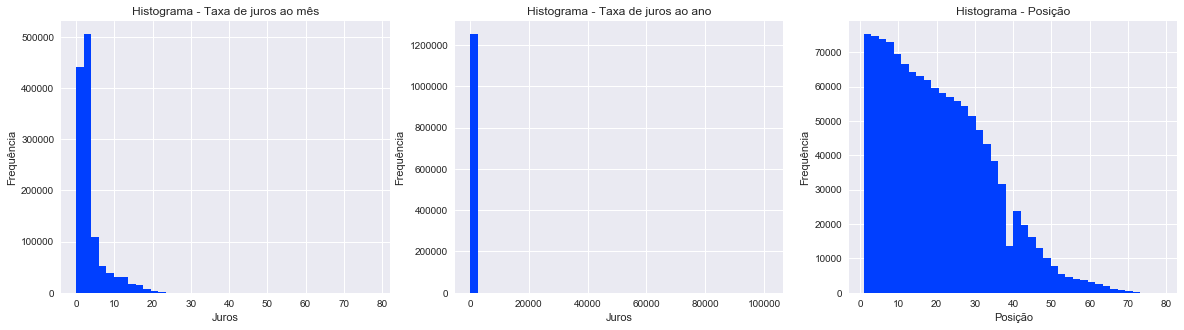

In [17]:
#HISTOGRAMA
fig, eixo = plt.subplots(1,3, figsize = (20,5))
opr_credito['TaxaJurosAoMes'].plot.hist(ax = eixo[0], 
                                        bins = 40, 
                                        title = 'Histograma - Taxa de juros ao mês')

opr_credito['TaxaJurosAoAno'].plot.hist(ax = eixo[1] , 
                                        bins = 40,
                                        title = 'Histograma - Taxa de juros ao ano')

opr_credito['Posicao'].plot.hist(ax = eixo[2] , 
                                        bins = 40,
                                        title = 'Histograma - Posição')

eixo[0].set_xlabel('Juros'); eixo[0].set_ylabel('Frequência')
eixo[1].set_xlabel('Juros'); eixo[1].set_ylabel('Frequência')
eixo[2].set_xlabel('Posição'); eixo[2].set_ylabel('Frequência')

plt.savefig('grafico 1', dpi = 400, bbox_inches = 'tight')
plt.show()

# Etapa 3: Limpeza de Dados I <a id="limpezaI"></a>
***
## 3.1. Excluindo colunas desnecessárias <a id="excluicolunas"></a>
> A coluna **cnpj8** não denota valor ao nosso estudo, a não ser que queiramos correlacionar essa base de dados com outra base de dados. Portanto, será excluída.

In [18]:
opr_credito = opr_credito.drop('cnpj8', axis = 1)
opr_credito.head()

,InicioPeriodo,FimPeriodo,Segmento,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno
0,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,1,DEUTSCHE BANK S.A.BCO ALEMAO,0.21,2.55
1,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,2,BCO MUFG BRASIL S.A.,0.22,2.72
2,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,3,BCO MIZUHO S.A.,0.27,3.29
3,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,4,BCO ABN AMRO S.A.,0.28,3.44
4,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,5,STANDARD CHARTERED BI S.A.,0.30,3.67


## 3.2. Identificando valores ausentes <a id="identausentes"></a>

In [19]:
#Quantidade de ZEROS nas Taxas de Juros ao Mês
len(opr_credito) - np.count_nonzero(opr_credito['TaxaJurosAoMes'])

2420

In [20]:
#Quantidade de ZEROS nas Taxas de Juros ao Ano
len(opr_credito) - np.count_nonzero(opr_credito['TaxaJurosAoAno'])

2380

In [21]:
#Alterando ZEROS por N/A
opr_credito[opr_credito == 0] = np.NaN
opr_credito.isnull().sum()

InicioPeriodo               0
FimPeriodo                  0
Segmento                    0
Modalidade                  0
Posicao                     0
InstituicaoFinanceira       0
TaxaJurosAoMes           2420
TaxaJurosAoAno           2380
dtype: int64

### 3.2.1. Tratando valores ausentes <a id="tratausentes"></a>

In [22]:
#Agrupando os dados por Segmento, Modalidade e Instituição Financeira... 
#...e calculando a mediana dos dados para cada grupo.
grupo_mediana = opr_credito[['Segmento',
                             'Modalidade',
                             'InstituicaoFinanceira',
                             'TaxaJurosAoMes',
                             'TaxaJurosAoAno']].groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'], as_index = False).agg('median')
grupo_mediana.head()

,Segmento,Modalidade,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno
0,PESSOA FÍSICA,AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO,AGORACRED S/A SCFI,7.65,142.275
1,PESSOA FÍSICA,AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO,AYMORÉ CFI S.A.,1.86,24.755
2,PESSOA FÍSICA,AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO,BANCO AZTECA DO BRASIL S.A.,2.04,27.360
3,PESSOA FÍSICA,AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO,BANCO CBSS,3.56,52.080
4,PESSOA FÍSICA,AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO,BANCO CNH INDUSTRIAL CAPITAL S.A,0.63,7.810


In [23]:
#Imputando nos campos NaN's as medianas obtidas com base na 'Instituição Financeira' e 'Modalidade' de operações de crédito.
opr_credito['TaxaJurosAoMes'] = opr_credito.groupby(['Segmento',
                                                     'Modalidade',
                                                     'InstituicaoFinanceira'])['TaxaJurosAoMes'].apply(lambda x: x.fillna(x.median()))

opr_credito['TaxaJurosAoAno'] = opr_credito.groupby(['Segmento',
                                                     'Modalidade',
                                                     'InstituicaoFinanceira'])['TaxaJurosAoAno'].apply(lambda x: x.fillna(x.median()))

In [24]:
#Visualização da quantidade de nulos depois de tratados
opr_credito.isnull().sum()

InicioPeriodo            0
FimPeriodo               0
Segmento                 0
Modalidade               0
Posicao                  0
InstituicaoFinanceira    0
TaxaJurosAoMes           0
TaxaJurosAoAno           0
dtype: int64

## 2.3. Identificando duplicatas <a id="identduplicatas"></a>

In [25]:
#função padrão
opr_credito.duplicated().sum()

0

> A base de dados não possui valores duplicados.

# Etapa 4: Limpeza dos Dados II <a id="limpezaII"></a>
***

## 4.1. Detectando e Tratando Outliers <a id="outliers"></a>

> Outliers são valores discrepantes que estão muito acima da média, ou seja, diverge de um padrão geral em uma amostra. Esses valores podem alterar dratiscamente os resultados da análise de dados, sendo assim é necessario identificá-los e tratá-los.
Para o tratamento de outliers a base de dados foi dividida em dois grandes grupos, conforme o tipo de segmento:
- **Pessoa Física**;
- **Pessoa Jurídica**. 

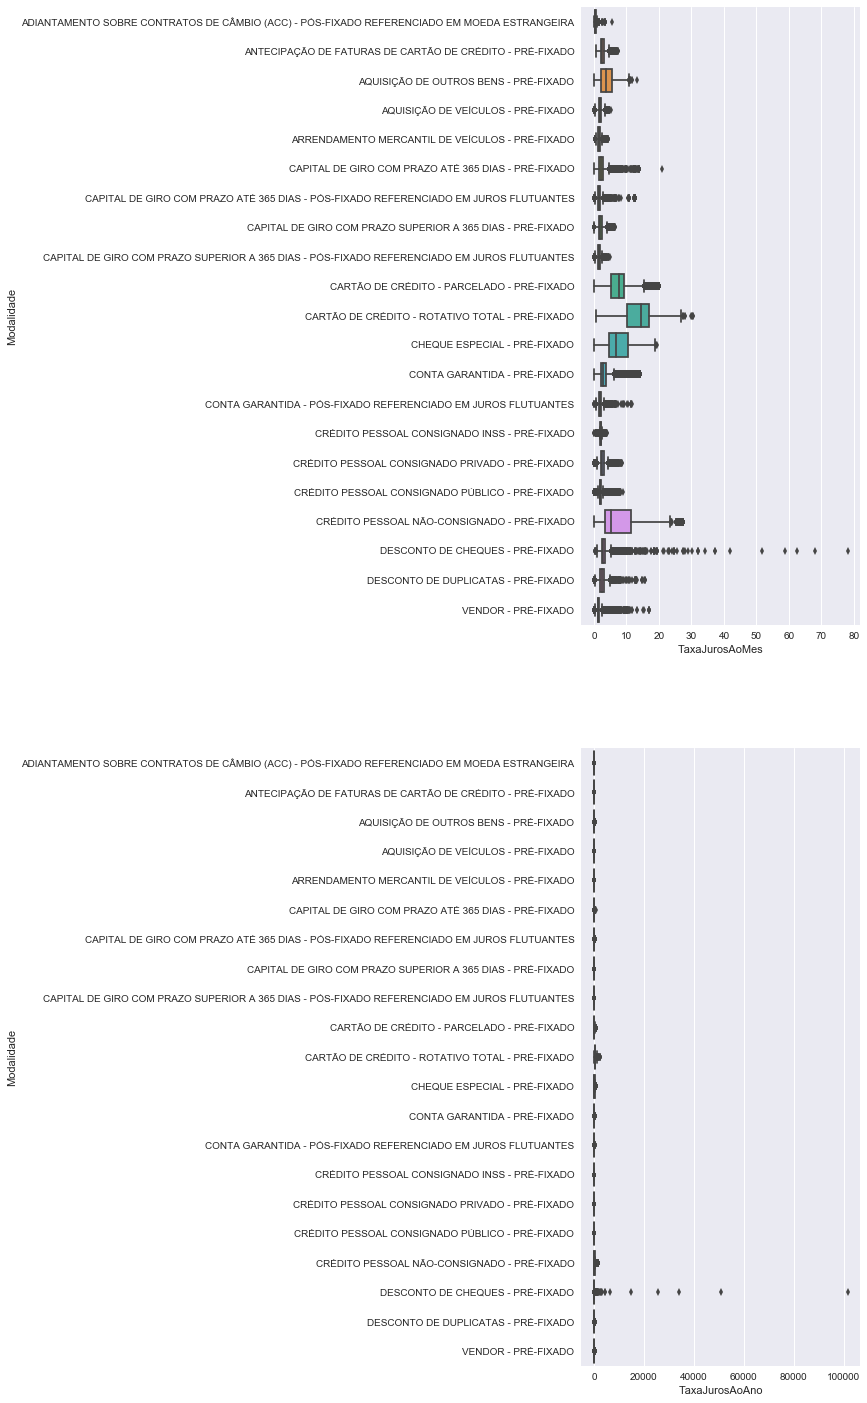

In [26]:
f, eixo = plt.subplots(2,1,figsize=(5,25))
sns.boxplot(ax = eixo[0], 
            x = 'TaxaJurosAoMes', 
            y = 'Modalidade', 
            data = opr_credito)

sns.boxplot(ax = eixo[1], 
            x = 'TaxaJurosAoAno', 
            y = 'Modalidade', 
            data = opr_credito)

plt.savefig('grafico 2', dpi = 400, bbox_inches = 'tight')#salva a figura em png
plt.show()

> Os valores extremos foram dectados para cada tipo de modalidade, e novos valores foram imputados com base no **Segmento**, **Modalidade** e **InstituiçãoFinanceira**.

In [27]:
#Lista das principais modalidades encontradas na base de dados
mod_fisica = ['AQUISIÇÃO DE OUTROS BENS - PRÉ-FIXADO', 
              'AQUISIÇÃO DE VEÍCULOS - PRÉ-FIXADO', 
              'ARRENDAMENTO MERCANTIL DE VEÍCULOS - PRÉ-FIXADO',
              'CARTÃO DE CRÉDITO - PARCELADO - PRÉ-FIXADO',
              'CARTÃO DE CRÉDITO - ROTATIVO TOTAL - PRÉ-FIXADO',
              'CHEQUE ESPECIAL - PRÉ-FIXADO',
              'CRÉDITO PESSOAL CONSIGNADO INSS - PRÉ-FIXADO',
              'CRÉDITO PESSOAL CONSIGNADO PRIVADO - PRÉ-FIXADO',
              'CRÉDITO PESSOAL CONSIGNADO PÚBLICO - PRÉ-FIXADO',
              'CRÉDITO PESSOAL NÃO-CONSIGNADO - PRÉ-FIXADO',
              'DESCONTO DE CHEQUES - PRÉ-FIXADO']

mod_juridica = ['ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) - PÓS-FIXADO REFERENCIADO EM MOEDA ESTRANGEIRA',
                'ANTECIPAÇÃO DE FATURAS DE CARTÃO DE CRÉDITO - PRÉ-FIXADO',
                'CAPITAL DE GIRO COM PRAZO ATÉ 365 DIAS - PRÉ-FIXADO',
                'CAPITAL DE GIRO COM PRAZO ATÉ 365 DIAS - PÓS-FIXADO REFERENCIADO EM JUROS FLUTUANTES',
                'CAPITAL DE GIRO COM PRAZO SUPERIOR A 365 DIAS - PRÉ-FIXADO',
                'CAPITAL DE GIRO COM PRAZO SUPERIOR A 365 DIAS - PÓS-FIXADO REFERENCIADO EM JUROS FLUTUANTES',
                'CHEQUE ESPECIAL - PRÉ-FIXADO',
                'CONTA GARANTIDA - PRÉ-FIXADO',
                'CONTA GARANTIDA - PÓS-FIXADO REFERENCIADO EM JUROS FLUTUANTES',
                'DESCONTO DE CHEQUES - PRÉ-FIXADO',
                'DESCONTO DE DUPLICATAS - PRÉ-FIXADO',
                'VENDOR - PRÉ-FIXADO']

### 4.1.1. Segmento -  PESSOA FÍSICA <a id="pessoafisica"></a>

In [28]:
#agrupa a base de dados por modalidade e obtem o valor do quartil de 25% e 75% de cada grupo
quartil25 = opr_credito.loc[opr_credito.Segmento == 'PESSOA FÍSICA',['Modalidade',
                                                                     'TaxaJurosAoMes',
                                                                     'TaxaJurosAoAno']].groupby('Modalidade').agg('quantile',0.25)
       
juros_mes25 = [valor for valor in quartil25.TaxaJurosAoMes]
juros_ano25 = [valor for valor in quartil25.TaxaJurosAoAno]

quartil75 = opr_credito.loc[opr_credito.Segmento == 'PESSOA FÍSICA',['Modalidade',
                                                                     'TaxaJurosAoMes',
                                                                     'TaxaJurosAoAno']].groupby('Modalidade').agg('quantile',0.75)
juros_mes75 = [valor for valor in quartil75.TaxaJurosAoMes]
juros_ano75 = [valor for valor in quartil75.TaxaJurosAoAno]

In [29]:
#Calcula os limites inferiores e superiores do diagrama de caixa para cada modalidade e segmento
lim_inferiorM, lim_superiorM = [],[]
lim_inferiorA, lim_superiorA = [],[]

for i in range(11):
        IQR1 = juros_mes75[i] - juros_mes25[i]
        lim_inferiorM.append(np.around(juros_mes25[i] - 1.5 * IQR1, 2))
        lim_superiorM.append(np.around(juros_mes75[i] + 1.5 * IQR1, 2))
        
        IQR2 = juros_ano75[i] - juros_ano25[i]
        lim_inferiorA.append(np.around(juros_ano25[i] - 1.5 * IQR2, 2))
        lim_superiorA.append(np.around(juros_ano75[i] + 1.5 * IQR2, 2))
        

In [30]:
#Trantando os outliers e imputando os valores na TaxaJurosAoMes   
for i in range(11):
    condicao1 = (opr_credito.Modalidade == mod_fisica[i]) & (opr_credito['TaxaJurosAoMes'] > lim_superiorM[i])
    opr_credito.loc[condicao1,'TaxaJurosAoMes'] = np.NaN
    opr_credito['TaxaJurosAoMes'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoMes'].transform(lambda x: x.fillna(np.around(x.mean(),2)))
    
    condicao2 = (opr_credito.Modalidade == mod_fisica[i]) & (opr_credito['TaxaJurosAoMes'] < lim_inferiorM[i])
    opr_credito.loc[condicao2,'TaxaJurosAoMes'] = np.NaN
    opr_credito['TaxaJurosAoMes'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoMes'].transform(lambda x: x.fillna(np.around(x.mean(),2)))    

In [31]:
#Trantando os outliers e imputando os valores na TaxaJurosAoAno      
for i in range(11):
    condicao1 = (opr_credito.Modalidade == mod_fisica[i]) & (opr_credito['TaxaJurosAoAno'] > lim_superiorA[i])
    opr_credito.loc[condicao1,'TaxaJurosAoAno'] = np.NaN
    opr_credito['TaxaJurosAoAno'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoAno'].transform(lambda x: x.fillna(np.around(x.mean(),2)))
    
    condicao2 = (opr_credito.Modalidade == mod_fisica[i]) & (opr_credito['TaxaJurosAoAno'] < lim_inferiorA[i])
    opr_credito.loc[condicao2,'TaxaJurosAoAno'] = np.NaN
    opr_credito['TaxaJurosAoAno'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoAno'].transform(lambda x: x.fillna(np.around(x.mean(),2)))

### 4.1.1. Segmento -  PESSOA JURÍDICA <a id="pessoajuridica"></a>

In [32]:
#agrupa a base de dados por modalidade e obtem o valor do quartil de 25% e 75% de cada grupo
quartil25 = opr_credito.loc[opr_credito.Segmento == 'PESSOA JURÍDICA',['Modalidade',
                                                                     'TaxaJurosAoMes',
                                                                     'TaxaJurosAoAno']].groupby('Modalidade').agg('quantile',0.25)
       
juros_mes25 = [valor for valor in quartil25.TaxaJurosAoMes]
juros_ano25 = [valor for valor in quartil25.TaxaJurosAoAno]

quartil75 = opr_credito.loc[opr_credito.Segmento == 'PESSOA JURÍDICA',['Modalidade',
                                                                     'TaxaJurosAoMes',
                                                                     'TaxaJurosAoAno']].groupby('Modalidade').agg('quantile',0.75)
juros_mes75 = [valor for valor in quartil75.TaxaJurosAoMes]
juros_ano75 = [valor for valor in quartil75.TaxaJurosAoAno]

In [33]:
# Calcula os limites inferiores e superiores do diagrama de caixa para cada modalidade e segmento
lim_inferiorM, lim_superiorM = [],[]
lim_inferiorA, lim_superiorA = [],[]

for i in range(12):
        IQR1 = juros_mes75[i] - juros_mes25[i]
        lim_inferiorM.append(np.around(juros_mes25[i] - 1.5 * IQR1, 2))
        lim_superiorM.append(np.around(juros_mes75[i] + 1.5 * IQR1, 2))
        
        IQR2 = juros_ano75[i] - juros_ano25[i]
        lim_inferiorA.append(np.around(juros_ano25[i] - 1.5 * IQR2, 2))
        lim_superiorA.append(np.around(juros_ano75[i] + 1.5 * IQR2, 2))

In [34]:
#Trantando os outliers e imputando os valores na TaxaJurosAoMes     
for i in range(12):
    condicao1 = (opr_credito.Modalidade == mod_juridica[i]) & (opr_credito['TaxaJurosAoMes'] > lim_superiorM[i])
    opr_credito.loc[condicao1,'TaxaJurosAoMes'] = np.NaN
    opr_credito['TaxaJurosAoMes'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoMes'].transform(lambda x: x.fillna(np.around(x.mean(),2)))
    
    condicao2 = (opr_credito.Modalidade == mod_juridica[i]) & (opr_credito['TaxaJurosAoMes'] < lim_inferiorM[i])
    opr_credito.loc[condicao2,'TaxaJurosAoMes'] = np.NaN
    opr_credito['TaxaJurosAoMes'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoMes'].transform(lambda x: x.fillna(np.around(x.mean(),2)))    

In [35]:
#Trantando os outliers e imputando os valores na TaxaJurosAoAno   
for i in range(12):
    condicao1 = (opr_credito.Modalidade == mod_juridica[i]) & (opr_credito['TaxaJurosAoAno'] > lim_superiorA[i])
    opr_credito.loc[condicao1,'TaxaJurosAoAno'] = np.NaN
    opr_credito['TaxaJurosAoAno'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoAno'].transform(lambda x: x.fillna(np.around(x.mean(),2)))
    
    condicao2 = (opr_credito.Modalidade == mod_juridica[i]) & (opr_credito['TaxaJurosAoAno'] < lim_inferiorA[i])
    opr_credito.loc[condicao2,'TaxaJurosAoAno'] = np.NaN
    opr_credito['TaxaJurosAoAno'] = opr_credito.groupby(['Segmento',
                                                         'Modalidade',
                                                         'InstituicaoFinanceira'])['TaxaJurosAoAno'].transform(lambda x: x.fillna(np.around(x.mean(),2)))

In [36]:
opr_credito['TaxaJurosAoMes'] = opr_credito.groupby(['Segmento',
                                                     'Modalidade'])['TaxaJurosAoMes'].apply(lambda x: x.fillna(np.around(x.mean(),2)))

opr_credito['TaxaJurosAoAno'] = opr_credito.groupby(['Segmento',
                                                     'Modalidade'])['TaxaJurosAoAno'].apply(lambda x: x.fillna(np.around(x.mean(),2)))

# Etapa 5: Visualização gráfica dos dados após a limpeza<a id="visualizacao"></a>
***
Uma forma eficiente para compreender a tendência central de um conjunto de dados é por meio da plotagem de gráficos. Abaixo, algumas das representações.

In [37]:
#constrói os valores que serão usados nos eixos x e y do gráfico
def valor_eixo(dados):
    inicio = np.nanmin(dados)
    fim = np.nanmax(dados)+1
    amostra = dados.count()
    intervalo = (fim-inicio)/(1 + 3.3 * np.log10(amostra)) * 2
    return(np.around(np.arange(inicio, fim, intervalo), decimals = 2))

## 5.1. Diagrama de Caixa<a id="diagcaixa"></a>

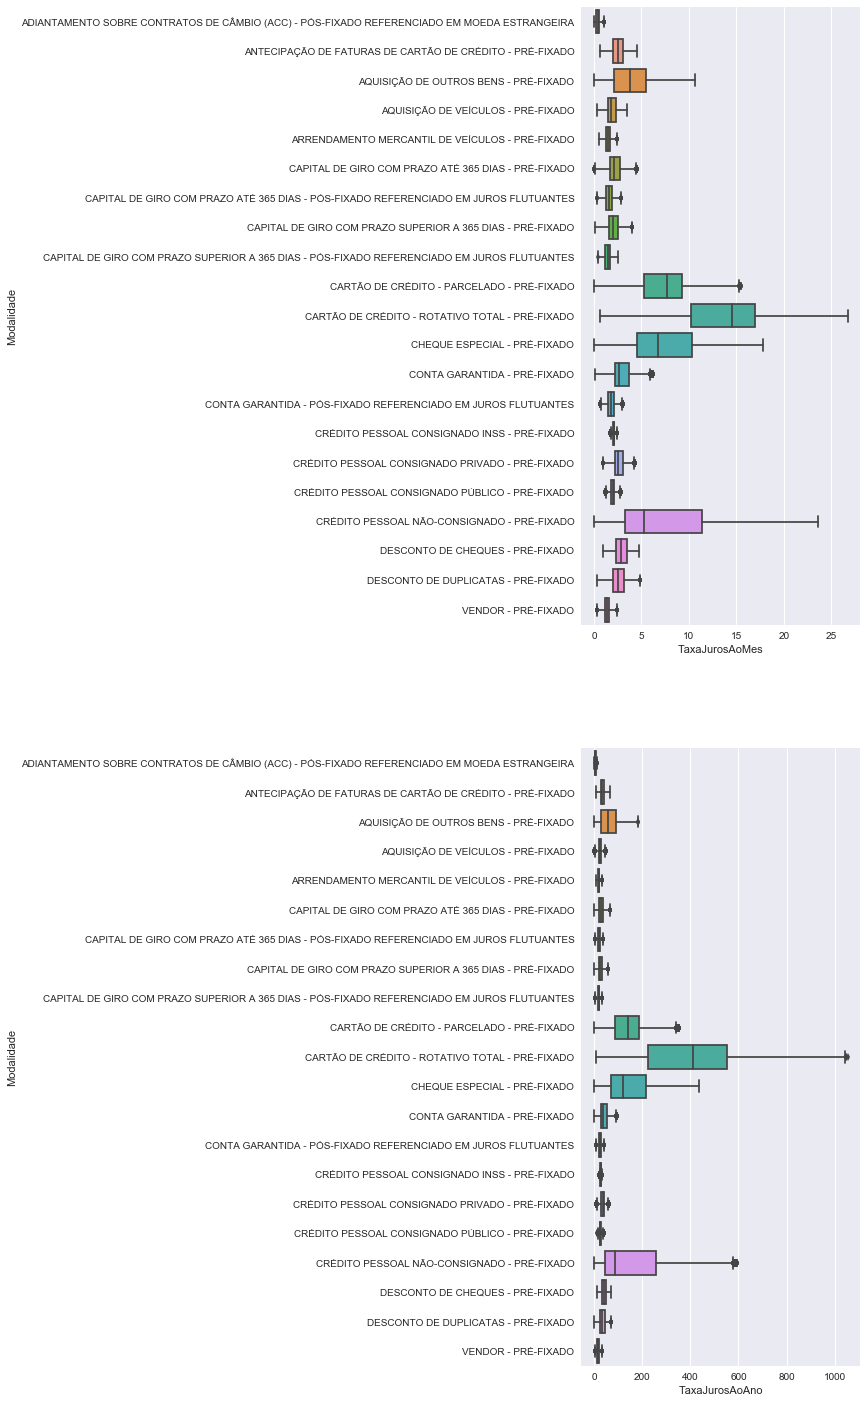

In [38]:
f, eixo = plt.subplots(2,1,figsize=(5,25))
sns.boxplot(ax = eixo[0], 
            x = 'TaxaJurosAoMes', 
            y = 'Modalidade', 
            data = opr_credito)

sns.boxplot(ax = eixo[1], 
            x = 'TaxaJurosAoAno', 
            y = 'Modalidade', 
            data = opr_credito)

plt.savefig('grafico 3', dpi = 400, bbox_inches = 'tight')
plt.show()

## 5.2. Histograma <a id="histograma"></a>

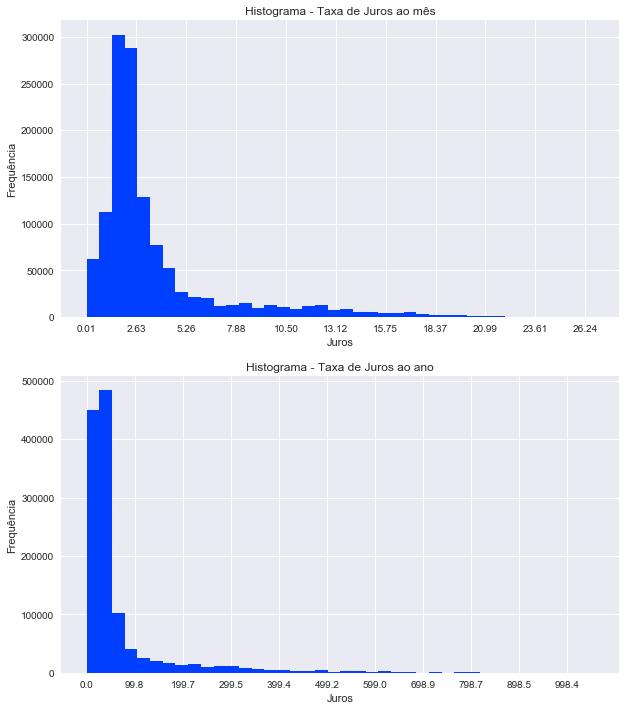

In [39]:
fig, eixo = plt.subplots(2,1, figsize = (10,12))
#Dados do gráfico 1
opr_credito['TaxaJurosAoMes'].plot.hist(ax = eixo[0], 
                                        bins = 40, 
                                        xticks = valor_eixo(opr_credito.TaxaJurosAoMes),
                                        title = 'Histograma - Taxa de Juros ao mês')
#Dados do gráfico 2
opr_credito['TaxaJurosAoAno'].plot.hist(ax = eixo[1] , 
                                        bins = 40,
                                        xticks = valor_eixo(opr_credito.TaxaJurosAoAno),
                                        title = 'Histograma - Taxa de Juros ao ano')

eixo[0].set_xlabel('Juros'); eixo[0].set_ylabel('Frequência')
eixo[1].set_xlabel('Juros'); eixo[1].set_ylabel('Frequência')

plt.savefig('grafico 4', dpi = 400, bbox_inches = 'tight')
plt.show()

# Etapa 6: Engenharia de Recursos (criação de variáveis)<a id="engrecursos"></a>
***
> Esta etapa visa a geração de novas variáveis/ recursos a partir das variáveis existentes na base de dados. Pela a base de dados pode ser gerados as seguintes variáveis:
* **DiasDecorrido:** quantidade de dias decorrido entre o **InícioPeriodo** e **FimPerído**.

In [40]:
#Obtendo o total de dias
opr_credito['DiasDecorrido'] = ((opr_credito['FimPeriodo'] - opr_credito['InicioPeriodo']) /  np.timedelta64(1, 'D')).astype('int64')
opr_credito[['FimPeriodo','InicioPeriodo','DiasDecorrido']][:5]

,FimPeriodo,InicioPeriodo,DiasDecorrido
0,2018-10-19,2018-10-15,4
1,2018-10-19,2018-10-15,4
2,2018-10-19,2018-10-15,4
3,2018-10-19,2018-10-15,4
4,2018-10-19,2018-10-15,4


In [41]:
opr_credito.head()

,InicioPeriodo,FimPeriodo,Segmento,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,DiasDecorrido
0,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,1,DEUTSCHE BANK S.A.BCO ALEMAO,0.21,2.55,4
1,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,2,BCO MUFG BRASIL S.A.,0.22,2.72,4
2,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,3,BCO MIZUHO S.A.,0.27,3.29,4
3,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,4,BCO ABN AMRO S.A.,0.28,3.44,4
4,2018-10-15,2018-10-19,PESSOA JURÍDICA,ADIANTAMENTO SOBRE CONTRATOS DE CÂMBIO (ACC) -...,5,STANDARD CHARTERED BI S.A.,0.30,3.67,4


In [42]:
opr_credito.to_csv('dados_alterados.csv', sep = ';') #cria um arquivo .csv

# Etapa 7: Visualização Tableau<a id="tableau"></a>
***
> Link para acesso na plataforma **Tableau Public**: https://public.tableau.com/shared/8BSXY8TPH?:toolbar=no&:display_count=yes

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1553030210572' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TaxadeJurosdeOperaesdeCrditoDirioBRASIL&#47;Histria1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TaxadeJurosdeOperaesdeCrditoDirioBRASIL&#47;Histria1' /><param name='tabs' value='no' /><param name='toolbar' value='no' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TaxadeJurosdeOperaesdeCrditoDirioBRASIL&#47;Histria1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1553030210572');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='940px';vizElement.style.height='1225px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js'; vizElement.parentNode.insertBefore(scriptElement, vizElement); </script>